In [1]:
## importing libraries

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import ast

In [2]:
## Loading csv into pandas dataframe
cupid_df = pd.read_csv(r"C:\Users\sghad\OneDrive\Desktop\DA\Final Project\data_set\okcupid_data.csv")

In [3]:
cupid_df['diet'].unique()

array([nan, 'anything', 'strictly other', 'mostly anything',
       'mostly vegan', 'strictly anything', 'strictly vegan',
       'mostly vegetarian', 'strictly vegetarian', 'vegan', 'vegetarian',
       'mostly other', 'other', 'mostly kosher', 'strictly halal',
       'halal', 'mostly halal', 'strictly kosher', 'kosher'], dtype=object)

In [4]:
def categorize_diet(diet):
    if diet in ['vegan', 'mostly vegan', 'strictly vegan', 'vegetarian', 'mostly vegetarian', 'strictly vegetarian']:
        return 'vegan_vegetarian'
    else:
        return 'anything'

# Example usage
cupid_df['new_category_diet'] = cupid_df['diet'].apply(categorize_diet)


<Axes: xlabel='new_category_diet'>

Text(0.5, 0, 'Diet')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Distribution of Individuals by body type')

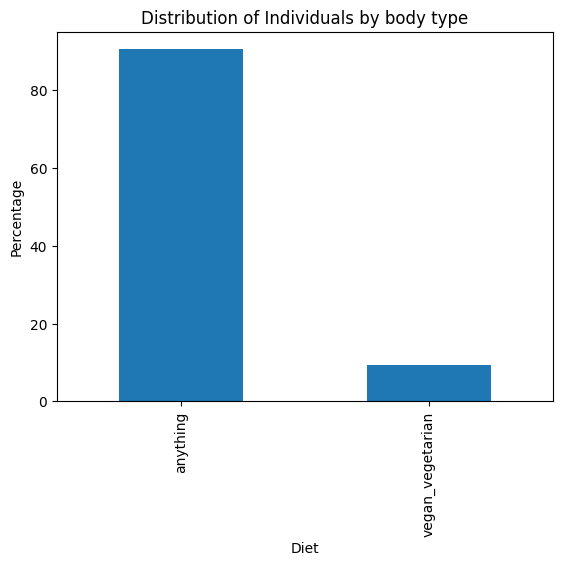

In [5]:
(cupid_df['new_category_diet'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.xlabel('Diet')
plt.ylabel('Percentage')
plt.title('Distribution of Individuals by body type')
plt.show()

In [6]:
# Calculate the distribution of 'diet' excluding missing values
diet_distribution = cupid_df['new_category_diet'].value_counts(normalize=True)
missing_values_diet = cupid_df['new_category_diet'].isnull().sum()

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(diet_distribution.index, size=missing_values_diet, p=diet_distribution.values)

# Assign the generated values to the missing values in 'diet' column
cupid_df.loc[cupid_df['new_category_diet'].isnull(), 'new_category_diet'] = filled_values

In [7]:
missing_values_diet = cupid_df['new_category_diet'].isnull().sum()
missing_values_diet

0

<Axes: xlabel='new_category_diet'>

Text(0.5, 0, 'Diet')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Distribution of Individuals by Diet')

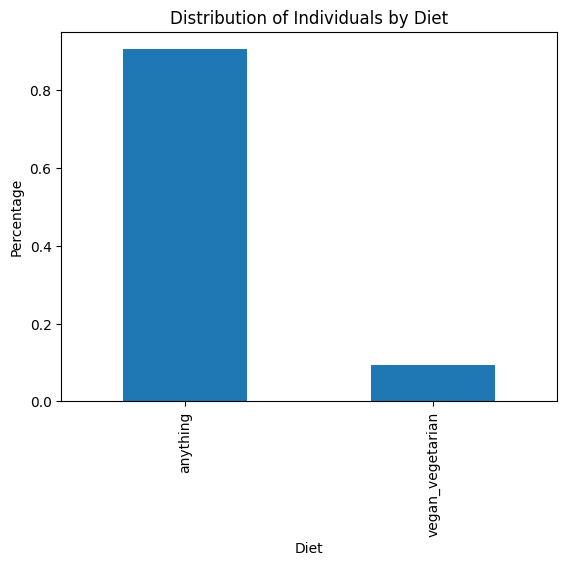

In [8]:
diet_distribution.plot(kind='bar')
plt.xlabel('Diet')
plt.ylabel('Percentage')
plt.title('Distribution of Individuals by Diet')
plt.show()